In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
df = pd.read_csv("https://olinda.bcb.gov.br/olinda/servico/Pix_DadosAbertos/versao/v1/odata/TransacoesPixPorMunicipio(DataBase=@DataBase)?@DataBase='202011'&$format=text/csv", decimal=",")
# df = pd.read_csv('pix.csv', index_col=0)

In [18]:
df['Ano'] = df['AnoMes'].astype(str).str[:4].astype(int)
df['Mes'] = df['AnoMes'].astype(str).str[-2:].astype(int)

In [77]:
pix = df[['AnoMes', 'Ano', 'Mes', 'Municipio', 'Estado', 'Regiao', 'VL_PagadorPF', 'QT_PagadorPF', 'VL_PagadorPJ', 'QT_PagadorPJ', 'VL_RecebedorPF', 'QT_RecebedorPF', 'VL_RecebedorPJ', 'QT_RecebedorPJ']].copy()
pix.columns = ['YearMonth', 'Year', 'Month', 'City', 'State', 'Region', 'Sent by people (value)', 'Sent by people (count)', 'Sent by companies (value)', 'Sent by companies (count)', 'Received by people (value)', 'Received by people (count)', 'Received by companies (value)', 'Received by companies (count)']
pix = pix.query('Year > 2020 and YearMonth < 202402')
pix['YearMonth'] = [np.datetime64(x) for x in (pix['YearMonth'].astype(str).str[:4] + '-' + pix['YearMonth'].astype(str).str[-2:]).values.tolist()]
pix = pix.sort_values(['Year', 'Month']).reset_index(drop=True)
pix = pix[['YearMonth', 'City', 'State', 'Region', 'Sent by people (value)', 'Sent by people (count)', 'Sent by companies (value)', 'Sent by companies (count)', 'Received by people (value)', 'Received by people (count)', 'Received by companies (value)', 'Received by companies (count)']]
# pix[['Sent by people (value)', 'Sent by companies (value)', 'Received by people (value)', 'Received by companies (value)']] /= 1e6

pix.loc[pix['Region'] == 'SUDESTE', 'Region'] = 'Southeast'
pix.loc[pix['Region'] == 'SUL', 'Region'] = 'South'
pix.loc[pix['Region'] == 'NORDESTE', 'Region'] = 'Northeast'
pix.loc[pix['Region'] == 'NORTE', 'Region'] = 'North'
pix.loc[pix['Region'] == 'CENTRO-OESTE', 'Region'] = 'Center-west'
pix.tail()

,YearMonth,City,State,Region,Sent by people (value),Sent by people (count),Sent by companies (value),Sent by companies (count),Received by people (value),Received by people (count),Received by companies (value),Received by companies (count)
206048,2024-01-01,CAFEZAL DO SUL,PARANÁ,South,9155376.37,41571,2372112.05,2090,9656113.17,23104,2903134.35,5162
206049,2024-01-01,ESTRELA DO NORTE,SÃO PAULO,Southeast,6778317.57,38527,1424156.15,1451,6061684.32,21600,1092549.94,2553
206050,2024-01-01,ALTO FELIZ,RIO GRANDE DO SUL,South,4107248.07,16522,8232859.56,1490,3403932.37,7431,8838084.02,2775
206051,2024-01-01,IAÇU,BAHIA,Northeast,47200540.07,342491,9590968.95,9616,46338083.86,235165,8221952.00,27428
206052,2024-01-01,CAPIM BRANCO,MINAS GERAIS,Southeast,21625037.21,137533,8719742.80,9441,21405042.68,82373,8176613.10,18497


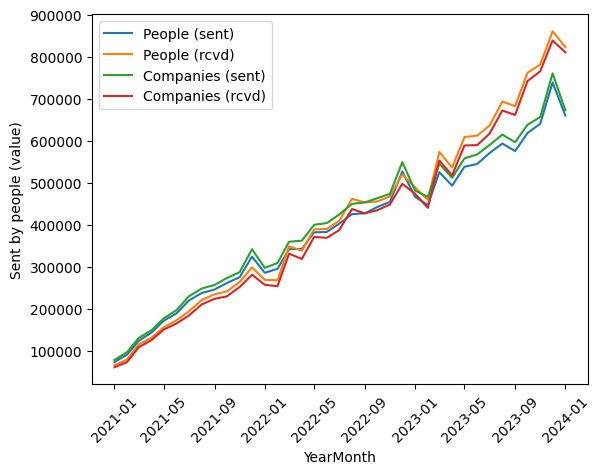

In [25]:
tmp = pix.groupby('YearMonth')[['Sent by people (value)', 'Sent by companies (value)', 'Received by people (value)', 'Received by companies (value)']].sum()

sns.lineplot(data = tmp, x = 'YearMonth', y = 'Sent by people (value)', label='People (sent)')
sns.lineplot(data = tmp, x = 'YearMonth', y = 'Sent by companies (value)', label='People (rcvd)')
sns.lineplot(data = tmp, x = 'YearMonth', y = 'Received by people (value)', label='Companies (sent)')
sns.lineplot(data = tmp, x = 'YearMonth', y = 'Received by companies (value)', label='Companies (rcvd)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [107]:
pix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206053 entries, 0 to 206052
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   YearMonth                      206053 non-null  datetime64[ns]
 1   City                           206053 non-null  object        
 2   State                          206053 non-null  object        
 3   Region                         206053 non-null  object        
 4   Sent by people (value)         206053 non-null  float64       
 5   Sent by people (count)         206053 non-null  int64         
 6   Sent by companies (value)      206053 non-null  float64       
 7   Sent by companies (count)      206053 non-null  int64         
 8   Received by people (value)     206053 non-null  float64       
 9   Received by people (count)     206053 non-null  int64         
 10  Received by companies (value)  206053 non-null  float64       
 11  

In [43]:
pix

,YearMonth,City,State,Region,Sent by people (value),Sent by people (count),Sent by companies (value),Sent by companies (count),Received by people (value),Received by people (count),Received by companies (value),Received by companies (count)
0,2021-01-01,SOCORRO DO PIAUÍ,PIAUÍ,NORDESTE,0.350462,1064,0.033903,24,0.345943,1086,0.111435,51
1,2021-01-01,MARECHAL DEODORO,ALAGOAS,NORDESTE,10.478211,22819,6.547284,3240,11.385621,22675,6.124236,2108
2,2021-01-01,BARRO PRETO,BAHIA,NORDESTE,0.591130,1985,0.031180,12,0.630373,2033,0.008653,22
3,2021-01-01,SÃO JOÃO DO CARÚ,MARANHÃO,NORDESTE,0.576945,1150,0.192114,61,0.567698,1173,0.055334,43
4,2021-01-01,ALAGOA GRANDE,PARAÍBA,NORDESTE,2.403077,6202,0.251685,144,2.594711,6725,0.174589,105
...,...,...,...,...,...,...,...,...,...,...,...,...
206048,2024-01-01,CAFEZAL DO SUL,PARANÁ,SUL,9.155376,41571,2.372112,2090,9.656113,23104,2.903134,5162
206049,2024-01-01,ESTRELA DO NORTE,SÃO PAULO,SUDESTE,6.778318,38527,1.424156,1451,6.061684,21600,1.092550,2553
206050,2024-01-01,ALTO FELIZ,RIO GRANDE DO SUL,SUL,4.107248,16522,8.232860,1490,3.403932,7431,8.838084,2775
206051,2024-01-01,IAÇU,BAHIA,NORDESTE,47.200540,342491,9.590969,9616,46.338084,235165,8.221952,27428


In [101]:
tmp = pix[pix['City'] == 'SÃO PAULO']

fig = px.bar(tmp, x = 'YearMonth', y = ['Sent by people (value)', 'Sent by companies (value)', 'Received by people (value)', 'Received by companies (value)'], title = 'Total transactions by type in São Paulo', labels = {'YearMonth': 'Date', 'value': 'Value in R$'})
fig.update_layout(
    width=900, height=400,
    margin=dict(l=80, t=50, b=20),
)

fig.show()

/usr/local/python/current/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [89]:
tmp = pix[pix['Region'] != 'Nao informado']
tmp = tmp.groupby(['YearMonth', 'Region'])[['Sent by people (value)', 'Sent by people (count)', 'Sent by companies (value)', 'Sent by companies (count)', 'Received by people (value)', 'Received by people (count)', 'Received by companies (value)', 'Received by companies (count)']].sum().reset_index()
tmp['Companies (count)'] = tmp[['Sent by companies (count)', 'Received by companies (count)']].sum(axis=1)
tmp['People (count)'] = tmp[['Sent by people (count)', 'Received by people (count)']].sum(axis=1)
display(tmp)

,YearMonth,Region,Sent by people (value),Sent by people (count),Sent by companies (value),Sent by companies (count),Received by people (value),Received by people (count),Received by companies (value),Received by companies (count),Companies (count),People (count)
0,2021-01-01,Center-west,8.712613e+09,16493591,6.039786e+09,1833587,9.147758e+09,16031453,5.273857e+09,1924653,3758240,32525044
1,2021-01-01,North,4.459123e+09,10981402,2.676080e+09,858166,4.601085e+09,10775429,2.337495e+09,854155,1712321,21756831
2,2021-01-01,Northeast,1.294581e+10,31275159,8.193721e+09,2454578,1.369910e+10,31508638,7.214074e+09,2431077,4885655,62783797
3,2021-01-01,South,1.004525e+10,19080821,1.528690e+10,3007660,1.088378e+10,18536982,1.436098e+10,3602009,6609669,37617803
4,2021-01-01,Southeast,3.647086e+10,75160165,3.300547e+10,8544250,3.922653e+10,74273633,3.109740e+10,9763602,18307852,149433798
...,...,...,...,...,...,...,...,...,...,...,...,...
180,2024-01-01,Center-west,7.013288e+10,292547681,6.364978e+10,27729168,7.193339e+10,187605132,6.264989e+10,79263582,106992750,480152813
181,2024-01-01,North,5.134422e+10,348104775,3.196580e+10,17445867,5.008087e+10,234469585,3.173333e+10,54343318,71789185,582574360
182,2024-01-01,Northeast,1.505351e+11,982969149,8.497386e+10,61564822,1.482306e+11,693111008,8.535137e+10,232286528,293851350,1676080157
183,2024-01-01,South,9.173715e+10,404372811,1.607485e+11,76232698,9.466514e+10,239344080,1.608486e+11,280121579,356354277,643716891


In [100]:
tmp = pix[pix['Region'] != 'Nao informado']
tmp = tmp.groupby(['YearMonth', 'Region'])[['Sent by people (value)', 'Sent by people (count)', 'Sent by companies (value)', 'Sent by companies (count)', 'Received by people (value)', 'Received by people (count)', 'Received by companies (value)', 'Received by companies (count)']].sum().reset_index()
tmp['Companies (count)'] = tmp[['Sent by companies (count)', 'Received by companies (count)']].sum(axis=1)
tmp['People (count)'] = tmp[['Sent by people (count)', 'Received by people (count)']].sum(axis=1)

fig = px.bar(tmp, x = 'YearMonth', y = 'Companies (count)', color = 'Region', title = 'Number of transactions by companies per region', labels = {'YearMonth': 'Date', 'Companies (count)': 'Number of transactions'})
fig.update_layout(
    width=900, height=400,
    margin=dict(l=80, t=50, b=20),
)

# fig.write_image('3.1-2.png')
fig.show()

/usr/local/python/current/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [108]:
tmp = pix[pix['Region'] != 'Nao informado']
tmp = tmp.groupby(['YearMonth', 'Region'])[['Sent by people (value)', 'Sent by people (count)', 'Sent by companies (value)', 'Sent by companies (count)', 'Received by people (value)', 'Received by people (count)', 'Received by companies (value)', 'Received by companies (count)']].sum().reset_index()
tmp['Companies (count)'] = tmp[['Sent by companies (count)', 'Received by companies (count)']].sum(axis=1)
tmp['People (count)'] = tmp[['Sent by people (count)', 'Received by people (count)']].sum(axis=1)

fig = px.bar(tmp, x = 'YearMonth', y = 'People (count)', color = 'Region', title = 'Number of transactions by people per region', labels = {'YearMonth': 'Date', 'People (count)': 'Number of transactions'})
fig.update_layout(
    width=900, height=400,
    margin=dict(l=80, t=50, b=20),
)

# fig.write_image('3.1-2.png')
fig.show()

/usr/local/python/current/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

